# Project on weatherforcasting :- Classification

 Loading the Crop Train and Test datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\project\WeatherForcasting\weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

# Data Cleaning Model bulding¶
Identifying the column datatypes and Droping the unneccesary columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Identifying the null values

In [7]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
df.dropna(subset=["Precip Type"],inplace=True)

In [9]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [10]:
df['Precip Type']=df['Precip Type'].replace({"rain":1,"snow":0})

In [11]:
df.drop(["Daily Summary","Loud Cover"],axis=1,inplace=True)

In [12]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],utc=True)

In [13]:
df["Summary"].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

<Axes: title={'center': 'Correlation matrix'}>

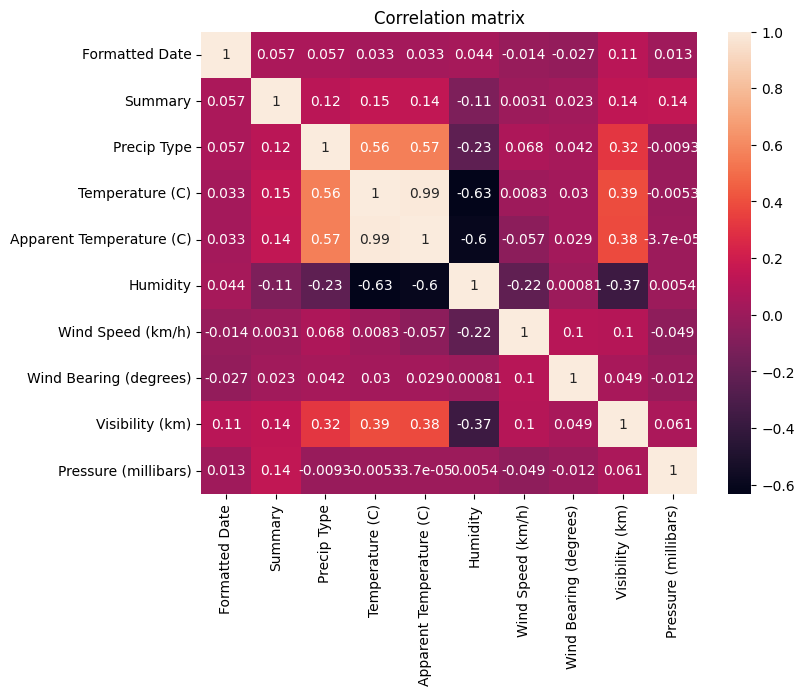

In [15]:
plt.figure(figsize=(8,6))
plt.title("Correlation matrix")
sns.heatmap(df.corr(),annot=True)

In [16]:
df.drop(["Formatted Date","Humidity","Wind Bearing (degrees)"],axis=1,inplace=True)

In [17]:
df.drop(["Summary"],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95936 entries, 0 to 96452
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               95936 non-null  int64  
 1   Temperature (C)           95936 non-null  float64
 2   Apparent Temperature (C)  95936 non-null  float64
 3   Wind Speed (km/h)         95936 non-null  float64
 4   Visibility (km)           95936 non-null  float64
 5   Pressure (millibars)      95936 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 5.1 MB


# Encoding the object columns using label encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Summary"] = encoder.fit_transform(df["Summary"])

In [19]:
X = df.drop(["Precip Type"],axis=1)
X.head()

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,14.1197,15.8263,1015.13
1,9.355556,7.227778,14.2646,15.8263,1015.63
2,9.377778,9.377778,3.9284,14.9569,1015.94
3,8.288889,5.944444,14.1036,15.8263,1016.41
4,8.755556,6.977778,11.0446,15.8263,1016.51


In [20]:
y = df["Precip Type"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Precip Type, dtype: int64

# Model Bulding
Preparing data for model building

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
X_train.shape

(76748, 5)

In [23]:
X_test.shape

(19188, 5)

# Classification model building using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9985928705440901

# Classification model building using naiveBayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9535126120491975

In [26]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

# Predicting the test values
Predicting the output for the test data

In [27]:
y_pred = model.predict(X_test)
y_pred[10:20]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [28]:
y_test[10:20]

19037    0
62697    1
39649    1
70501    1
52332    1
54420    0
36165    1
72453    1
79698    1
90806    0
Name: Precip Type, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

<Axes: >

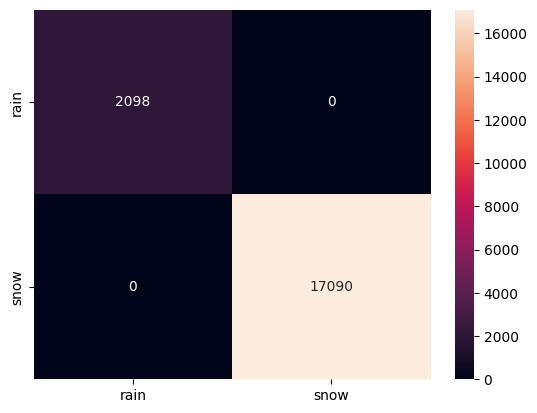

In [30]:
label = ['rain', 'snow']
sns.heatmap(cm,annot=True,fmt="d",xticklabels=label,yticklabels=label)

# Naive Bayes accuracy is greater than LogisticRegression

In [31]:
model.predict([[9.472222,7.388889,14.1197,15.8263,1015.13]])

array([1], dtype=int64)